In [15]:
from stesml.model_tools import build_train_test_model
from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data
from stesml.data_tools import get_scenario_index
from stesml.data_tools import get_train_and_test_index

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error
from stesml.plot_tools import plot_progress_results

In [68]:
data_dir = "../data/Sulfur_Models/"
model_type = 'RandomForest' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False
n_shuffles = 10

In [69]:
if model_type == 'NN':
    parameters = {'n_layers': 5, 'n_hidden_units': 86, 'batch_size': 180, 'epochs': 16}
elif model_type == 'XGBoost':
    parameters = {'n_estimators': 300}
elif model_type == 'RandomForest':
    parameters = {'n_estimators': 10}

In [70]:
result, addendum = build_train_test_model(data_dir, model_type, target, metric, scale, parameters, n_shuffles)

Shuffle #0, This Result: 3.4905, Average Result: 3.4905
Shuffle #1, This Result: 6.7762, Average Result: 5.1334
Shuffle #2, This Result: 6.4242, Average Result: 5.5636
Shuffle #3, This Result: 6.1136, Average Result: 5.7011
Shuffle #4, This Result: 4.1961, Average Result: 5.4001
Shuffle #5, This Result: 3.8898, Average Result: 5.1484
Shuffle #6, This Result: 6.8086, Average Result: 5.3856
Shuffle #7, This Result: 4.8296, Average Result: 5.3161
Shuffle #8, This Result: 6.7651, Average Result: 5.4771
Shuffle #9, This Result: 3.4266, Average Result: 5.2720


In [71]:
# Choose the model (indexed by shuffle number) from which you would like to see results
chosen_model = addendum[9]

In [72]:
y_test = chosen_model[0]
y_hat = chosen_model[1]
scenario_index = chosen_model[2]
train_index = chosen_model[3]
test_index = chosen_model[4]

In [73]:
test_df = load_data(scenario_index, test_index)

In [74]:
test_df[target+"_hat"] = y_hat

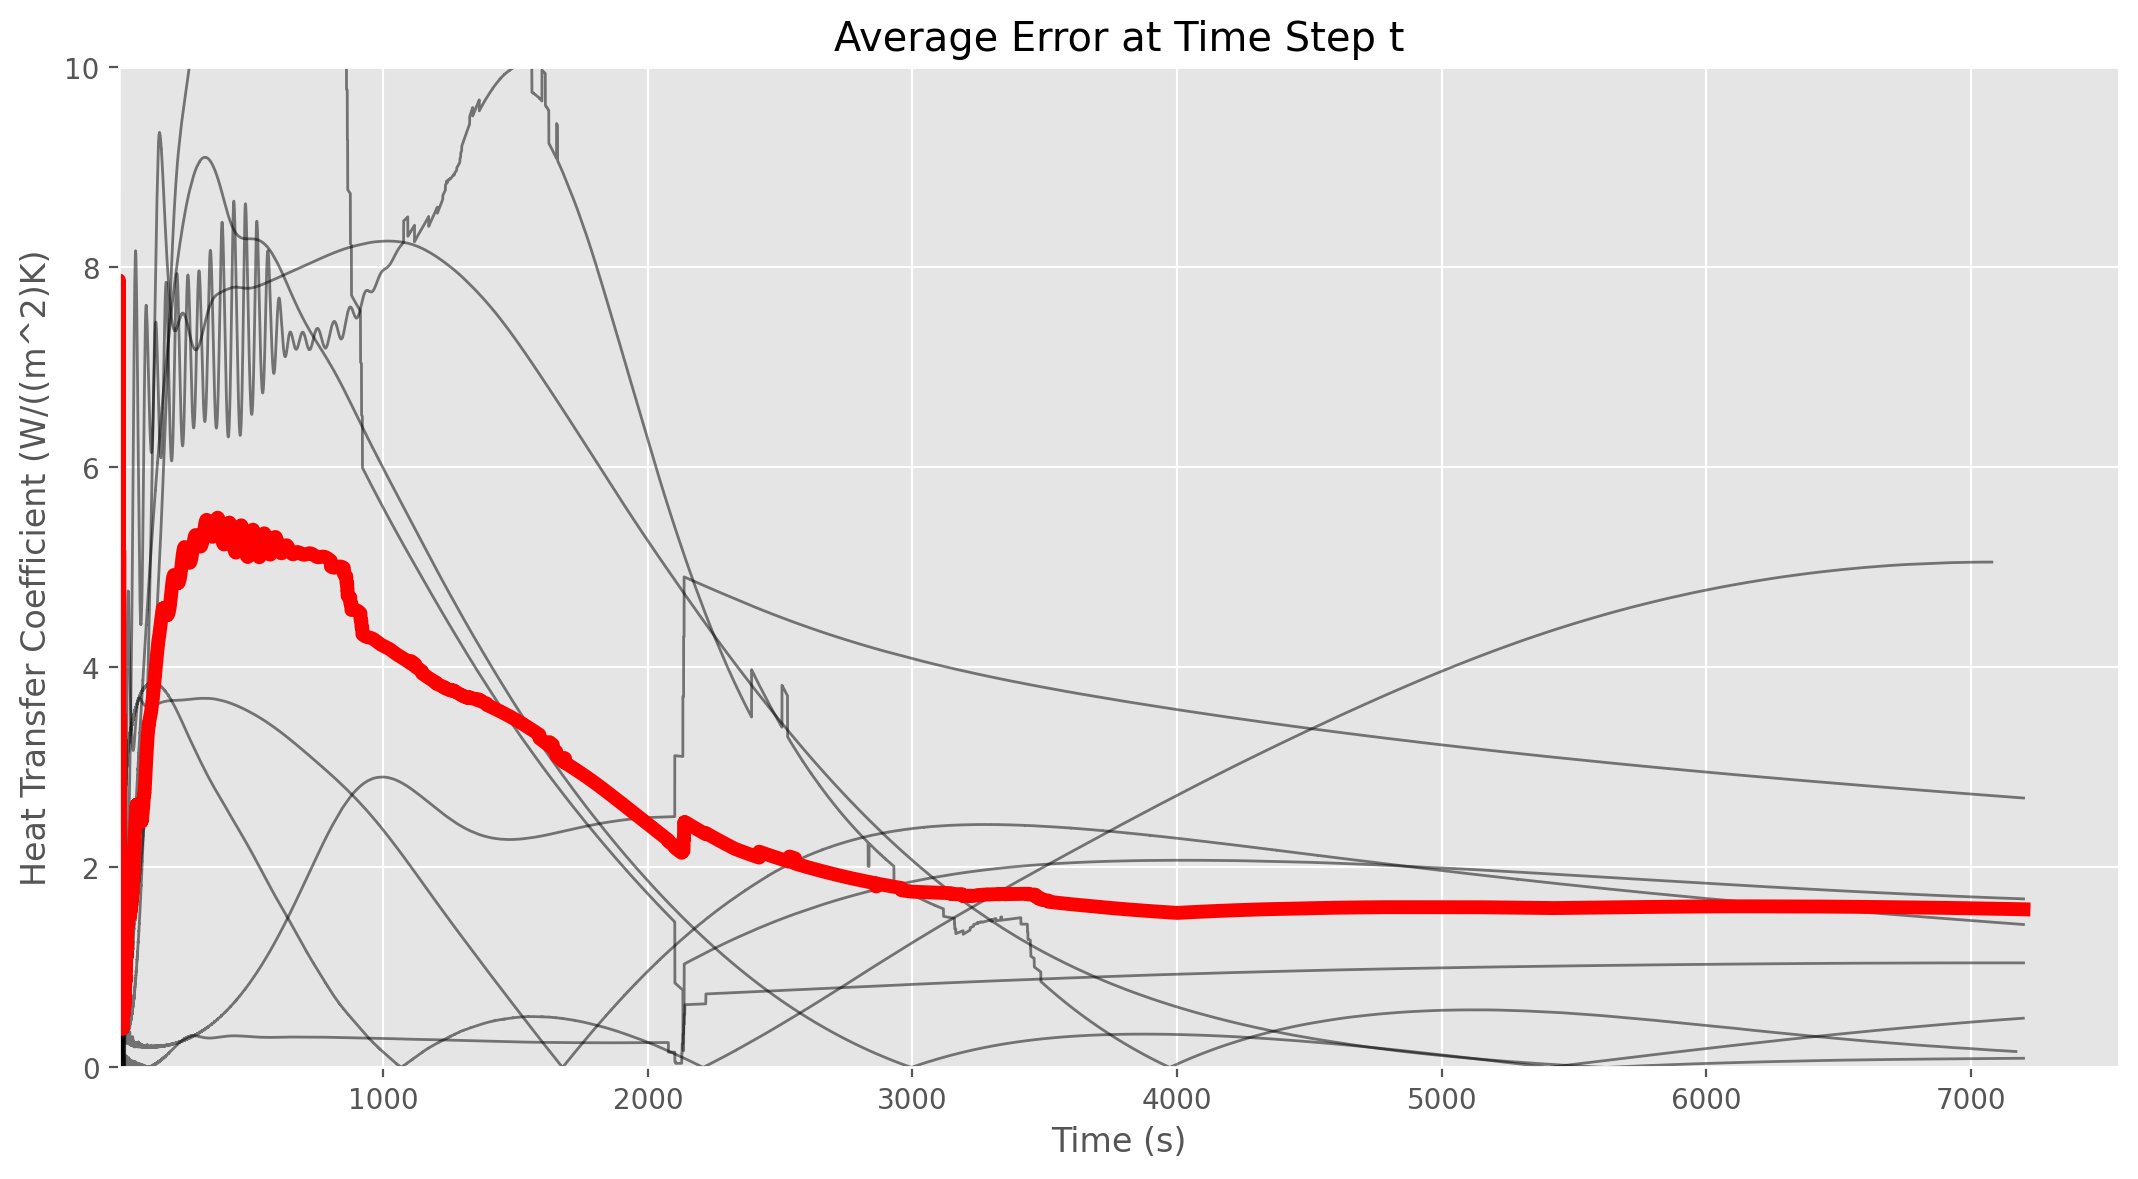

In [75]:
avg_error = plot_average_error(test_df, target=target)

<AxesSubplot:>

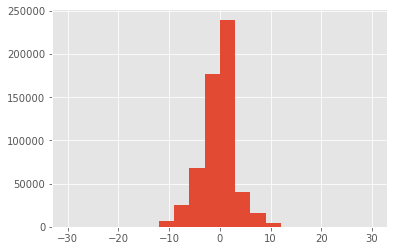

In [76]:
(test_df[target] - test_df[target+'_hat']).hist(bins=20, range=(-30, 30))

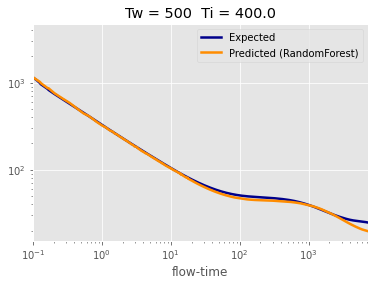

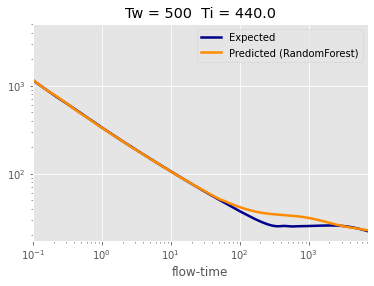

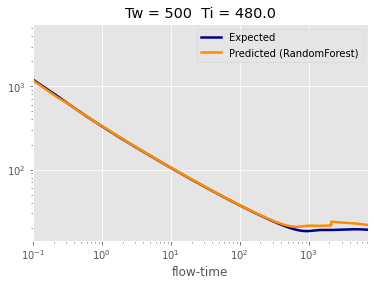

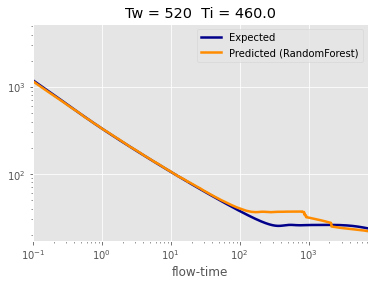

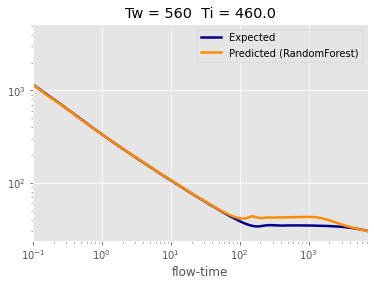

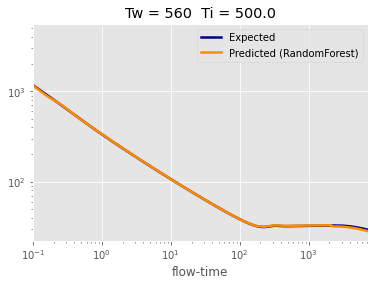

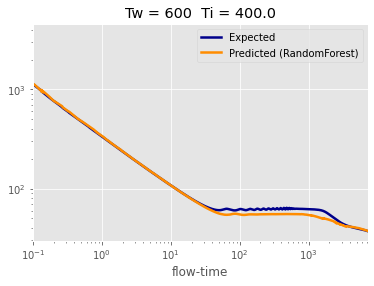

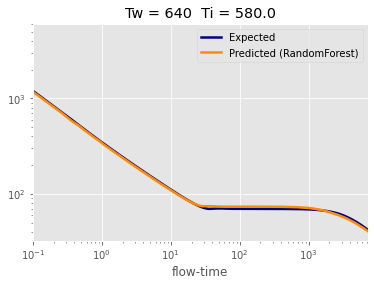

In [77]:
plot_test_results(test_df, model_type, target)

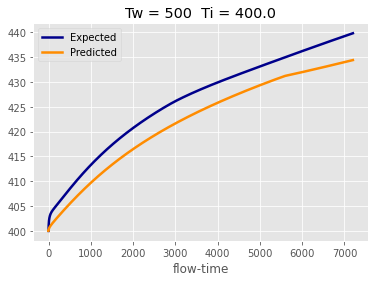

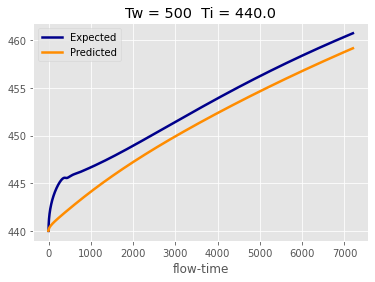

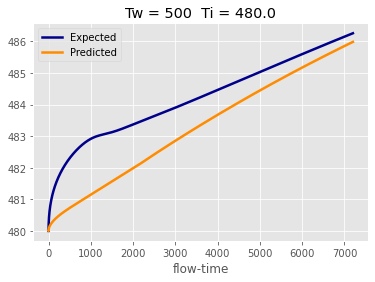

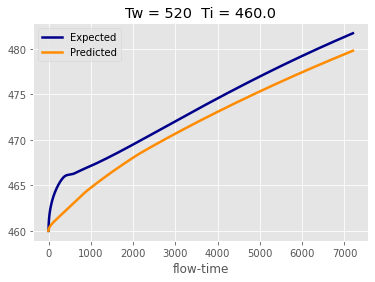

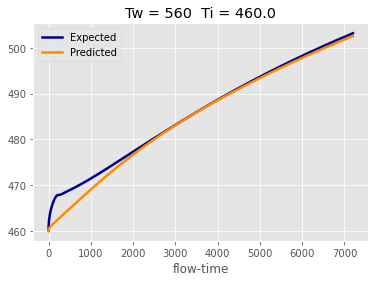

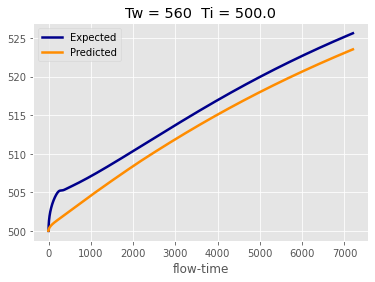

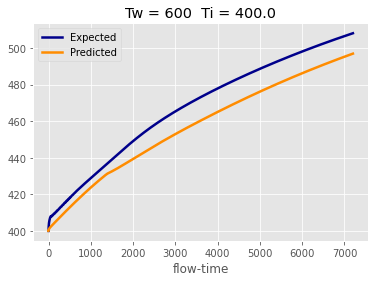

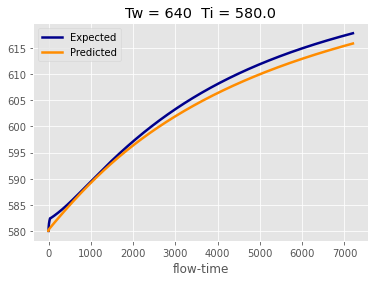

In [78]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(test_df, plot=True)
else:
    rmse, r2 = get_T_from_h_results(test_df, plot=True)

In [79]:
print(rmse)

4.342340850429079


In [80]:
print(r2)

0.99289539901037
